**The provided Python code is used to plot the EMG signal from a CSV file using pandas and matplotlib libraries. Here is a step-by-step explanation of how the code works:**

1. First, the necessary libraries are imported: `pandas` for data manipulation, `matplotlib` for plotting, and `numpy` for numerical computation.

2. The CSV file is loaded into a pandas DataFrame using the `read_csv` function. The `header=None` argument specifies that the CSV file has no header row.

3. Two arrays are created: `time` and `time2`. `time` is an array of 80000 evenly-spaced values between 0 and 5 seconds, while `time2` is an array of 80000 evenly-spaced values between 0 and 0.128 seconds. These arrays are used as the x-axis for the plots.
4. A figure with 8 rows and 2 columns of subplots is created using the `subplots` function from `matplotlib`. The size of the figure is specified as 12 inches by 8 inches using the `figsize` argument.

5. A list of colors is created to differentiate the EMG signals from each electrode.

6. A rolling mean of the EMG signal is calculated using the `rolling` function from pandas. The rolling mean is calculated over a window size of 128 samples.

7. For each electrode, the raw EMG signal and the rolling mean are plotted on thesubplots using the `plot` function from `matplotlib`. The electrode number is included in the label of each plot using the `str` function and the `i` variable.

8. The title of the first subplot in each row is set to "Signal From Electrode" using the `title.set_text` method.

9. The title of the second subplot in each row is set to "Signal After Taking Window" using the `title.set_text` method.

10. The x-axis label of the entire figure is set to "Time (sec)" using the `supxlabel` method.

11. The y-axis label of the entire figure is set to "Amplitude (V)" using the `supylabel` method.

12. The title of the entire figure is set to "Subject1 EMG Signal I_I1" using the `suptitle` method.

13. The plot is saved to a file using the `savefig` function from `matplotlib`. The file name is specified as "Subject1 EMG Signal I_I1" with no file extension.

14. The plot is displayed using the `show` function from `matplotlib`.

*This code generates a figure with 16 subplots (8 rows and 2 columns) showing the raw EMG signal and the rolling mean of each electrode. The figure is then saved to a file and displayed on the screen. This code can be used as a starting point for analyzing EMG signals and visualizing the results.Note: It is important to provide relevant information in the markdown documentation, such as what the data represents and the context of the analysis. This helps other users understand the purpose of the code and how it relates to the broader project or research study.*

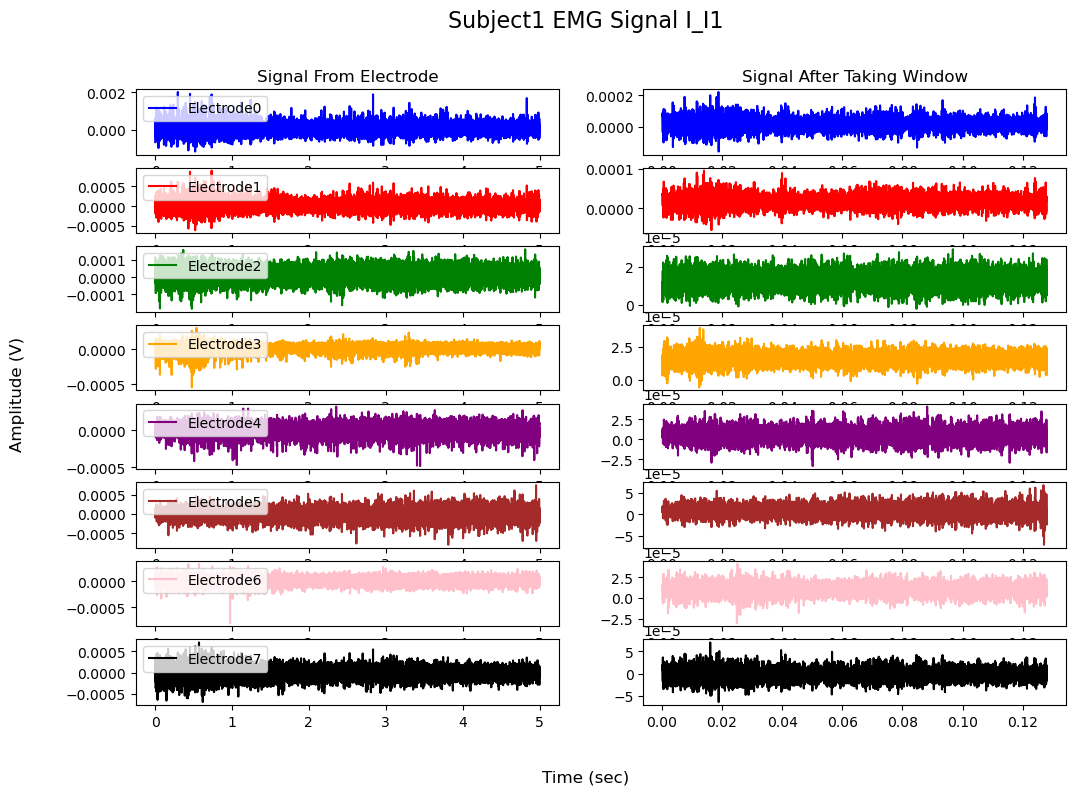

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a pandas DataFrame without headers
df = pd.read_csv(r'C:\Users\sweet\OneDrive\Desktop\dataset\S1-Delsys-15Class\I_I1.csv', header=None)


time =  np.linspace(0, 5, 80000)
fig, axs = plt.subplots(8, 2,figsize=(12, 8))
time2 =  np.linspace(0, 0.128, 80000)

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', "black"]
window_size = 128


# Extract the EMG signal from the DataFrame by specifying the column index
for i in range(0,8):
    emg_signal = df.iloc[:, i]
    rolling_mean = emg_signal.rolling(window_size).mean()
    axs[i,0].plot(time,emg_signal,color=colors[i], label="Electrode"+str(i))
    axs[i,1].plot(time2,rolling_mean,color=colors[i])
    axs[i,0].legend(loc='upper left')
    

axs[0,0].title.set_text("Signal From Electrode")
axs[0,1].title.set_text("Signal After Taking Window")

fig.supxlabel('Time (sec)')
fig.supylabel('Amplitude (V)')

fig.suptitle('Subject1 EMG Signal I_I1', fontsize=16)
plt.savefig("Subject1 EMG Signal I_I1 ")

plt.show()

**EMG Feature Extraction Results of whole record**

**This document summarizes the results of EMG feature extraction for the eight subjects included in the study.**

 1. First, the necessary libraries are imported:,`pandas` for data manipulation,`os` for interacting with the file system,`numpy` for numerical computation,`scipy.signal` for signal processing functions ,`scipy.linalg` for linear algebra functions

  2. loading the EMG signal from a CSV file and extracts the signal values from the DataFrame.

  3. For each subject, the following features were extracted from EMG signals recorded during finger movements:

        1.Number of zero crossings

        2.Waveform length

        3.Number of slope sign changes

        4.Mean absolute value

        5.Integral absolute value

        6.Activity

        7.Mobility

        8.Complexity

        9.Root mean square

        10.Skewness
        11-21. AR model parameters

*The extracted features were calculated for each of the five fingers separately, resulting in a total of 105 features per subject.*

   4. finally we display our extracted features 

In [68]:
import numpy as np
import os
import pandas as pd
from scipy import signal
import scipy.linalg as linalg

for i in range (1,9):    # From Subject-01 To Subject-08
    dir_path = r"D:\carrie works\cdss_finalproject\dataset\S"+str(i)
#     print('\n....................................................... Subject_0'+str(i)+" .................................................................")
    for file_name in os.listdir(dir_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(dir_path, file_name)
            df = pd.read_csv(file_path)
            result1=[]
            result=[]
            # Load EMG signal from CSV file
            for i, col_name in enumerate(df.columns):
                # Extract signal values from DataFrame
                emg_signal = df.iloc[:, i].values
                col_name_str = str(col_name)
                emg_signal = df[col_name_str].values
                
# Compute time domain features
                
                # Determine sign of each element in array
                sign = np.sign(emg_signal)
                # Calculate sign changes between consecutive elements of array
                sign_changes = np.diff(sign)
                # Count number of sign changes
                num_zero_crossings = np.count_nonzero(sign_changes)
                # Divide by two to obtain number of zero crossings
                num_zero_crossings = num_zero_crossings // 2                       # 1 feature
                result.append(num_zero_crossings)
                
                # Calculate absolute differences between consecutive elements of array
                diffs = np.abs(np.diff(emg_signal))
                # Sum the absolute differences to obtain waveform length
                waveform_length = np.sum(diffs)                                   # 2 feature
                result.append(waveform_length)
                
                # Calculate first-order differences between consecutive elements of array
                diffs3 = np.diff(emg_signal)
                # Determine sign of each first-order difference
                signs = np.sign(diffs3)
                # Calculate second-order differences between consecutive sign values
                diff_signs = np.diff(signs) 
                # Count number of sign changes
                num_slope_sign_changes = np.count_nonzero(diff_signs)
                # Divide by two to obtain number of slope sign changes
                num_slope_sign_changes = num_slope_sign_changes // 2                 # 3 feature
                result.append(num_slope_sign_changes)
                
                # Calculate absolute values of each element in array
                abs_signal = np.abs(emg_signal)
                # Take the mean of the absolute values to obtain MAV
                mav = np.mean(abs_signal)                                          # 4 feature
                result.append(mav)
                

                # Calculate cumulative sum of absolute values
                cumsum_abs_signal = np.cumsum(abs_signal)
                # Take the last element of the cumulative sum to obtain IAV
                iav = cumsum_abs_signal[-1]                                      # 5 feature
                result.append(iav)
                
                # Calculate first-order differences between consecutive elements of array
                diff1 = np.diff(emg_signal)
                # Calculate second-order differences between consecutive elements of the first-order differences
                diff2 = np.diff(diff1)
                # Calculate variance of signal and variances of first- and second-order differences
                var_signal = np.var(emg_signal)
                var_diff1 = np.var(diff1)
                var_diff2 = np.var(diff2)
                #the Hjorth time-domain parameters
                # Calculate activity, mobility, and complexity parameters
                activity = var_signal                                               # 6 feature 
                mobility = np.sqrt(var_diff1 / var_signal)                          # 7 feature 
                complexity = np.sqrt(var_diff2 / var_diff1) / mobility              # 8 feature
                result.append(activity)
                result.append(mobility)
                result.append(complexity)
                
                rms = np.sqrt(np.mean(np.square(emg_signal)))                       # 9 feature
                result.append(rms)
                mean = np.mean(emg_signal)
                std = np.std(emg_signal)
                skewness = np.mean((emg_signal - mean)**3) / np.power(std, 3)       # 10 feature
                result.append(skewness)
                
                # Calculate autocorrelation of signal
                autocorr = signal.lfilter(emg_signal, 1, emg_signal[::-1])
                # Generate Toeplitz matrix of autocorrelation values
                r = autocorr[:11]
                R = linalg.toeplitz(r)
                # Solve Yule-Walker equations to obtain AR model parameters
                a = linalg.solve(R, r)                                          # 11 - 21 features 
                
                for k in range (0,11):
                    result.append(a[k])
                    
features_dict1={"Number of zero crossings (1)":result[0], "Waveform length(1)": result[1], "Number of slope sign changes (1)":result[2], 
                            "Mean absolute value (1)": result[3], "Integral absolute  (1)": result[4], 'RMS (1)':result[5],'skewness (1)':result[6],"Activity (1)":result[7],"Mobility (1)":result[8],"Complexity(1)":result[9],'AR model P1 (1)' :result[10],
                            'AR model P2(1)' :result[11],'AR model P3(1)' :result[12],'AR model P4(1)' :result[13],'AR model P5(1)' :result[14],'AR model P6(1)' :result[15],'AR model P7 (1)' :result[16],'AR model P8 (1)' :result[17],'AR model P9(1)' :result[18],'AR model P10(1)' :result[19],'AR model P11(1)' :result[20],"Number of zero crossings (2)":result[21], "Waveform length(2)": result[22], "Number of slope sign changes (2)":result[23], 
                            "Mean absolute value (2)": result[24], "Integral absolute  (2)": result[25], 'RMS (2)': result[26],'skewness (2)':result[27],"Activity (2)":result[28],"Mobility (2)":result[29],"Complexity(2)":result[30],'AR model P1 (2)' :result[31],
                            'AR model P2(2)' :result[32],'AR model P3(2)' :result[33],'AR model P4(2)' :result[34],'AR model P5(2)' :result[35],'AR model P6(2)' :result[36],'AR model P7 (2)' :result[37],'AR model P8 (2)' :result[38],'AR model P9(2)' :result[39],'AR model P10(2)' :result[40],'AR model P11(2)' :result[41],"Number of zero crossings (3)":result[42], "Waveform length(3)": result[43], "Number of slope sign changes (3)":result[44], 
                            "Mean absolute value (3)": result[45], "Integral absolute  (3)": result[46], 'RMS (3)': result[47],'skewness (3)':result[48],"Activity (3)":result[49],"Mobility (3)":result[50],"Complexity(3)":result[51],'AR model P1 (3)' :result[52],
                            'AR model P2(3)' :result[53],'AR model P3(3)' :result[54],'AR model P4(3)' :result[55],'AR model P5(3)' :result[56],'AR model P6(3)' :result[57],'AR model P7 (3)' :result[58],'AR model P8 (3)' :result[59],'AR model P9(3)' :result[60],'AR model P10(3)' :result[61],'AR model P11(3)' :result[62],"Number of zero crossings (4)":result[63], "Waveform length(4)": result[64], "Number of slope sign changes (4)":result[65], 
                            "Mean absolute value (4)": result[66], "Integral absolute  (4)": result[67], 'RMS (4)': result[68],'skewness (4)':result[69],"Activity (4)":result[70],"Mobility (4)":result[71],"Complexity(4)":result[72],'AR model P1 (4)' :result[73],
                            'AR model P2(4)' :result[74],'AR model P3(4)' :result[75],'AR model P4(4)' :result[76],'AR model P5(4)' :result[77],'AR model P6(4)' :result[78],'AR model P7 (4)' :result[79],'AR model P8 (4)' :result[80],'AR model P9(4)' :result[81],'AR model P10(4)' :result[82],'AR model P11(4)' :result[83],"Number of zero crossings (5)":result[84], "Waveform length(5)": result[85], "Number of slope sign changes (5)":result[86], 
                            "Mean absolute value (5)": result[87], "Integral absolute  (5)": result[88], 'RMS (5)': result[89],'skewness (5)':result[90],"Activity (5)":result[91],"Mobility (5)":result[92],"Complexity(5)":result[93],'AR model P1 (5)' :result[94],
                            'AR model P2(5)' :result[95],'AR model P3(5)' :result[96],'AR model P4(5)' :result[97],'AR model P5(5)' :result[98],'AR model P6(5)' :result[99],'AR model P7 (5)' :result[100],'AR model P8 (5)' :result[101],'AR model P9(5)' :result[102],'AR model P10(5)' :result[103],'AR model P11(5)' :result[104],"Number of zero crossings (6)":result[105], "Waveform length(6)": result[106], "Number of slope sign changes (6)":result[107], 
                            "Mean absolute value (6)": result[108], "Integral absolute  (6)": result[109], 'RMS (6)': result[110],'skewness (6)':result[111],"Activity (6)":result[112],"Mobility (6)":result[113],"Complexity(6)":result[114],'AR model P1 (6)' :result[115],
                            'AR model P2(6)' :result[116],'AR model P3(6)' :result[117],'AR model P4(6)' :result[118],'AR model P5(6)' :result[119],'AR model P6(6)' :result[120],'AR model P7 (6)' :result[121],'AR model P8 (6)' :result[122],'AR model P9(6)' :result[123],'AR model P10(6)' :result[124],'AR model P11(6)' :result[125],"Number of zero crossings (7)":result[126], "Waveform length(7)": result[127], "Number of slope sign changes (7)":result[128], 
                            "Mean absolute value (7)": result[129], "Integral absolute  (7)": result[130], 'RMS (7)': result[131],'skewness (7)':result[132],"Activity (7)":result[133],"Mobility (7)":result[134],"Complexity(7)":result[135],'AR model P1 (7)' :result[136],
                            'AR model P2(7)' :result[137],'AR model P3(7)' :result[138],'AR model P4(7)' :result[139],'AR model P5(7)' :result[140],'AR model P6(7)' :result[141],'AR model P7 (7)' :result[142],'AR model P8 (7)' :result[143],'AR model P9(7)' :result[144],'AR model P10(7)' :result[145],'AR model P11(7)' :result[146],"Number of zero crossings (8)":result[147], "Waveform length(8)": result[148], "Number of slope sign changes (8)":result[149], 
                            "Mean absolute value (8)": result[150], "Integral absolute  (8)": result[151], 'RMS (8)': result[152],'skewness (8)':result[153],"Activity (8)":result[154],"Mobility (8)":result[155],"Complexity(8)":result[156],'AR model P1 (8)' :result[157],
                            'AR model P2(8)' :result[158],'AR model P3(8)' :result[159],'AR model P4(8)' :result[160],'AR model P5(8)' :result[161],'AR model P6(8)' :result[162],'AR model P7 (8)' :result[163],'AR model P8 (8)' :result[164],'AR model P9 (8)' :result[165],'AR model P10(8)' :result[166],'AR model P11(8)' :result[167]}

            print("Results for file: ", file_name)
            result1.append(features_dict1)
            results_df1 = pd.DataFrame(result1)
            display(results_df1)